In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import acquire_PJ

In [164]:
zillow_df = acquire_PJ.get_zillow_data()
zillow_df.head()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [165]:
# Create a function that will remove rows and columns that have missing values past a certain threshold.
def handle_missing_values(df, p_row = 0.84, p_col = 0.84):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(p_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(p_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [166]:
zillow_df = handle_missing_values(zillow_df)

In [167]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77474 non-null  int64  
 1   id                            77474 non-null  int64  
 2   parcelid                      77474 non-null  int64  
 3   bathroomcnt                   77474 non-null  float64
 4   bedroomcnt                    77474 non-null  float64
 5   calculatedbathnbr             76959 non-null  float64
 6   calculatedfinishedsquarefeet  77373 non-null  float64
 7   finishedsquarefeet12          73919 non-null  float64
 8   fips                          77474 non-null  float64
 9   fullbathcnt                   76959 non-null  float64
 10  latitude                      77474 non-null  float64
 11  longitude                     77474 non-null  float64
 12  lotsizesquarefeet             69300 non-null  float64
 13  p

In [168]:
# Create a list of columns to drop.
columns_to_drop = ['transactiondate','assessmentyear','id','Unnamed: 0','parcelid','calculatedbathnbr'
                   ,'finishedsquarefeet12','fullbathcnt','propertycountylandusecode','propertylandusetypeid',
                   'rawcensustractandblock','regionidcity','regionidcounty','regionidzip',
                   'structuretaxvaluedollarcnt','censustractandblock','propertylandusedesc', 'roomcnt']





In [169]:
def drop_columns(df, drop_col):
    df = df.drop(columns=drop_col)
    return df

In [170]:
zillow_df = drop_columns(zillow_df, columns_to_drop)

In [171]:
zillow_df.shape

(77474, 13)

In [172]:
for col in zillow_df.columns:
    if zillow_df[col].isna().sum() > 0:
        zillow_df[col] = zillow_df[col].fillna(value = zillow_df[col].mean())
        #print(zillow_df[col])

In [173]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   77474 non-null  float64
 1   bedroomcnt                    77474 non-null  float64
 2   calculatedfinishedsquarefeet  77474 non-null  float64
 3   fips                          77474 non-null  float64
 4   latitude                      77474 non-null  float64
 5   longitude                     77474 non-null  float64
 6   lotsizesquarefeet             77474 non-null  float64
 7   roomcnt                       77474 non-null  float64
 8   yearbuilt                     77474 non-null  float64
 9   taxvaluedollarcnt             77474 non-null  float64
 10  landtaxvaluedollarcnt         77474 non-null  float64
 11  taxamount                     77474 non-null  float64
 12  logerror                      77474 non-null  float64
dtypes

In [174]:
zillow_df.isna().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
dtype: int64

In [175]:
zillow_df = zillow_df.rename(columns = {'fips':'county', 'calculatedfinishedsquarefeet' : 'area', 'bathroomcnt' : 'bathrooms',
                         'bedroomcnt' : 'bedrooms', 'poolcnt' : 'pools', 'garagecarcnt' : 'garages',
                          'taxvaluedollarcnt': 'tax_value'})

In [176]:
# Cleaning the data
# Creating counties
zillow_df['LA_County']= zillow_df['county'] == 6037
zillow_df['Orange_County']= zillow_df['county'] == 6059
zillow_df['Ventura_County']= zillow_df['county'] == 6111


In [177]:
zillow_df['LA_County'] = zillow_df['LA_County'].replace(False, 0)
zillow_df['LA_County'] = zillow_df['LA_County'].replace(True, 1)

zillow_df['Orange_County'] = zillow_df['Orange_County'].replace(False, 0)
zillow_df['Orange_County'] = zillow_df['Orange_County'].replace(True, 1)

zillow_df['Ventura_County'] = zillow_df['Ventura_County'].replace(False, 0)
zillow_df['Ventura_County'] = zillow_df['Ventura_County'].replace(True, 1)

In [178]:
def yearbuilt_years(df):
    df.yearbuilt =  df.yearbuilt.astype(int)
    year = date.today().year
    df['age'] = year - df.yearbuilt
    # dropping the 'yearbuilt' column now that i have the age
    df = df.drop(columns=['yearbuilt'])
    return df

In [179]:
zillow_df = yearbuilt_years(zillow_df)

In [180]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              77474 non-null  float64
 1   bedrooms               77474 non-null  float64
 2   area                   77474 non-null  float64
 3   county                 77474 non-null  float64
 4   latitude               77474 non-null  float64
 5   longitude              77474 non-null  float64
 6   lotsizesquarefeet      77474 non-null  float64
 7   roomcnt                77474 non-null  float64
 8   tax_value              77474 non-null  float64
 9   landtaxvaluedollarcnt  77474 non-null  float64
 10  taxamount              77474 non-null  float64
 11  logerror               77474 non-null  float64
 12  LA_County              77474 non-null  int64  
 13  Orange_County          77474 non-null  int64  
 14  Ventura_County         77474 non-null  int64  
 15  ag

In [181]:
zillow_df = zillow_df[zillow_df.bedrooms != 0]
zillow_df = zillow_df[zillow_df.bathrooms != 0]

In [182]:
zillow_df.shape

(76720, 16)

In [183]:
# Later Lets look at pools and garages!
# Create new features here

zillow_df['acres']= zillow_df.lotsizesquarefeet/43560


# ratio of bathrooms to bedrooms
zillow_df['bed_bath_ratio'] = zillow_df.bedrooms / zillow_df.bathrooms

# bin ages
zillow_df['age_bins'] = pd.cut(zillow_df.age, 
                               bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                               labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, 
                                     .60, .666, .733, .8, .866, .933])

# bin acres
zillow_df['acres_bin'] = pd.cut(zillow_df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200], 
                    labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])
    
    
# update datatypes of binned values to be float
#zillow_df = zillow_df.astype({'acres_bin': 'float64', 'age_bin': 'float64'}).dtypes


In [184]:
zillow_df = zillow_df.astype({'acres_bin': float, 'age_bins': float})

In [185]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76720 entries, 0 to 77573
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              76720 non-null  float64
 1   bedrooms               76720 non-null  float64
 2   area                   76720 non-null  float64
 3   county                 76720 non-null  float64
 4   latitude               76720 non-null  float64
 5   longitude              76720 non-null  float64
 6   lotsizesquarefeet      76720 non-null  float64
 7   roomcnt                76720 non-null  float64
 8   tax_value              76720 non-null  float64
 9   landtaxvaluedollarcnt  76720 non-null  float64
 10  taxamount              76720 non-null  float64
 11  logerror               76720 non-null  float64
 12  LA_County              76720 non-null  int64  
 13  Orange_County          76720 non-null  int64  
 14  Ventura_County         76720 non-null  int64  
 15  ag

## Outliers

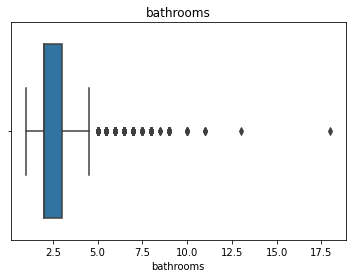

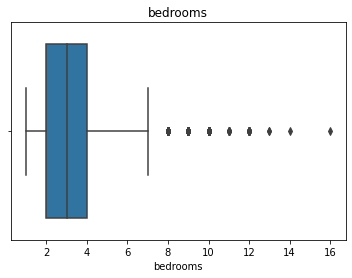

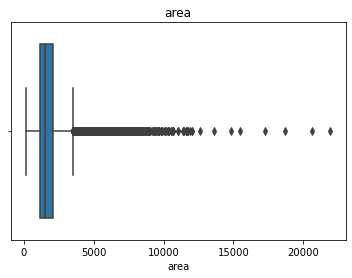

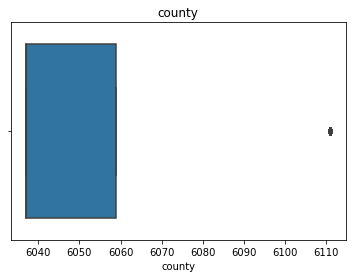

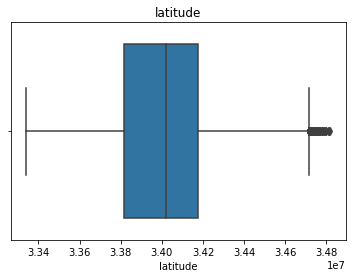

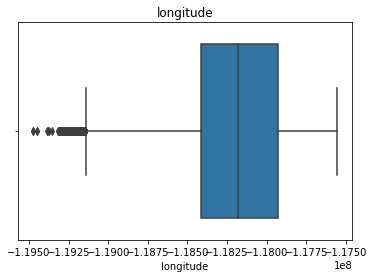

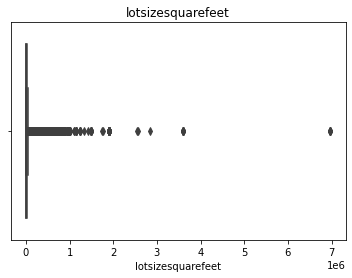

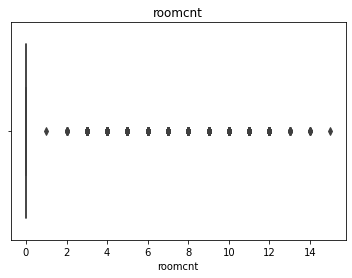

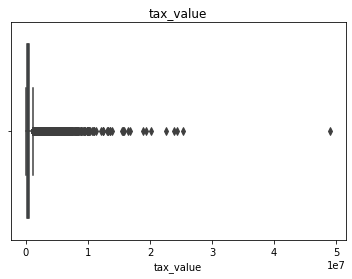

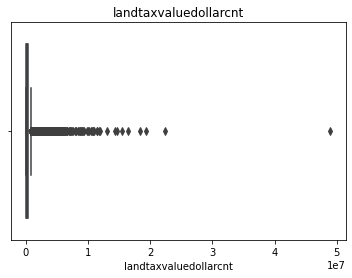

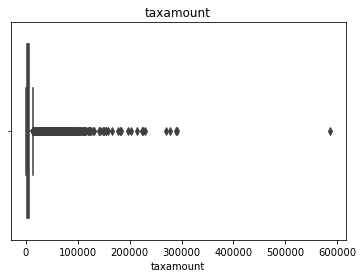

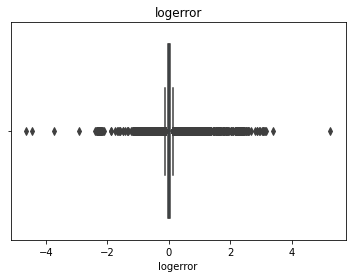

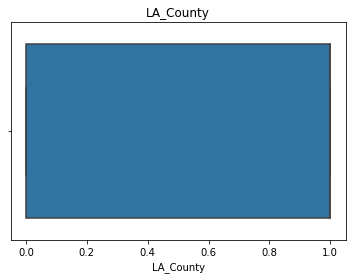

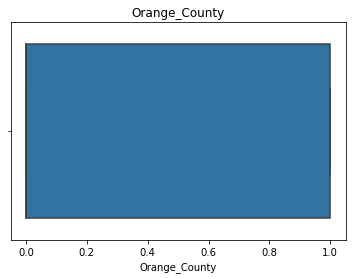

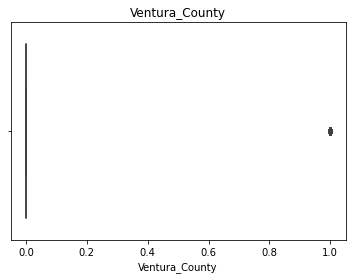

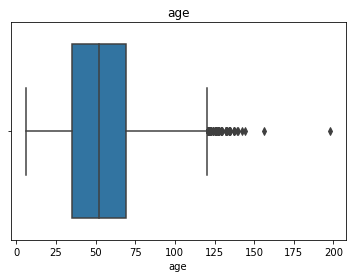

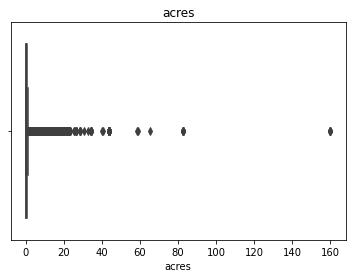

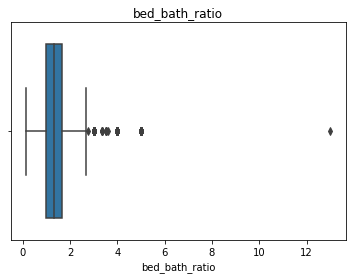

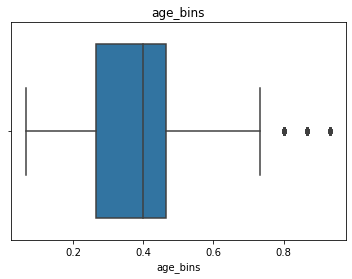

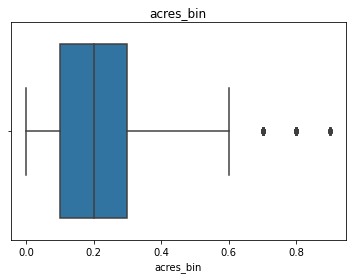

In [186]:
# viewing outliers
for col in zillow_df.columns:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

In [200]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''

    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

### roomcnt caused an issue

In [201]:
col_list = ['bedrooms', 'bathrooms', 'area', 'tax_value',
            'lotsizesquarefeet', 'taxamount', 'age', 'acres',
           'bed_bath_ratio', 'landtaxvaluedollarcnt']
k = 1.5
    
zillow_df = remove_outliers(zillow_df, k, col_list)

In [202]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45647 entries, 1 to 77573
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              45647 non-null  float64
 1   bedrooms               45647 non-null  float64
 2   area                   45647 non-null  float64
 3   county                 45647 non-null  float64
 4   latitude               45647 non-null  float64
 5   longitude              45647 non-null  float64
 6   lotsizesquarefeet      45647 non-null  float64
 7   roomcnt                45647 non-null  float64
 8   tax_value              45647 non-null  float64
 9   landtaxvaluedollarcnt  45647 non-null  float64
 10  taxamount              45647 non-null  float64
 11  logerror               45647 non-null  float64
 12  LA_County              45647 non-null  int64  
 13  Orange_County          45647 non-null  int64  
 14  Ventura_County         45647 non-null  int64  
 15  ag

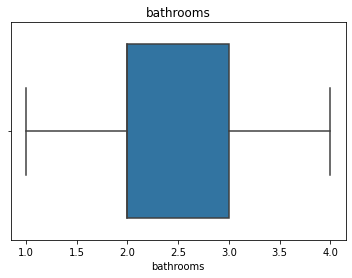

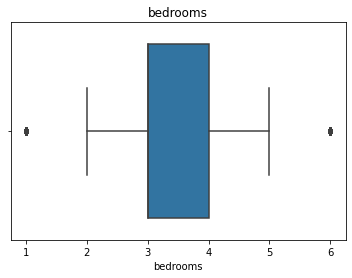

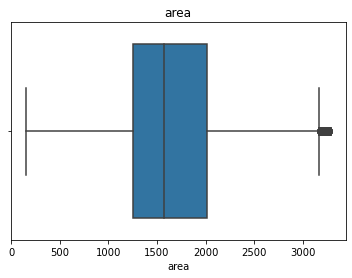

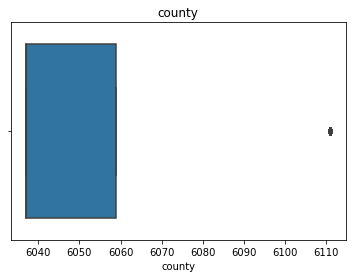

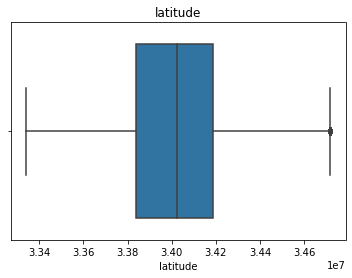

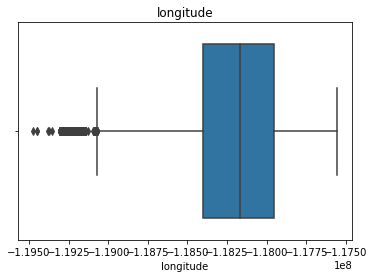

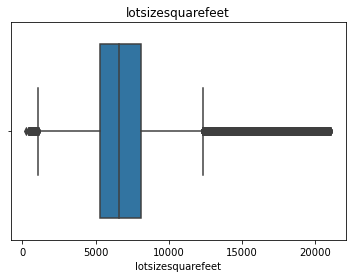

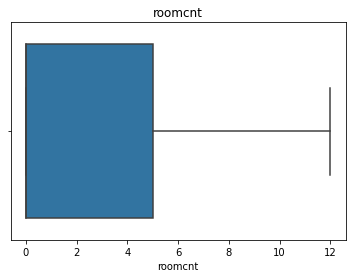

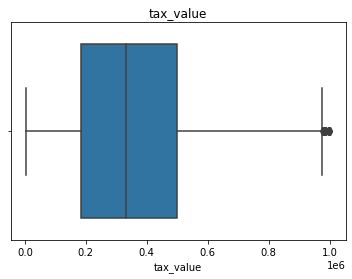

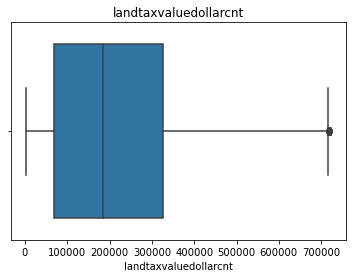

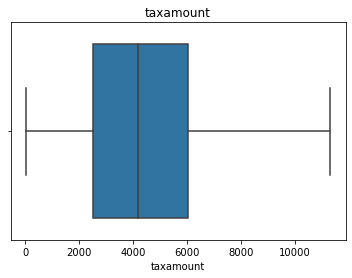

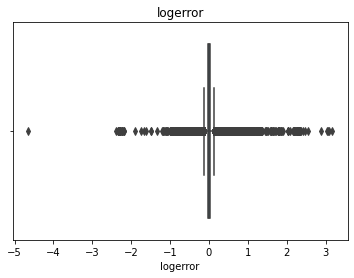

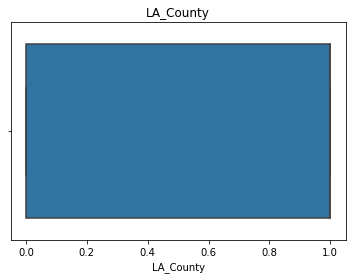

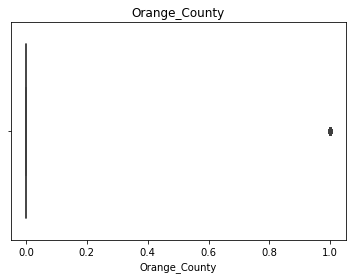

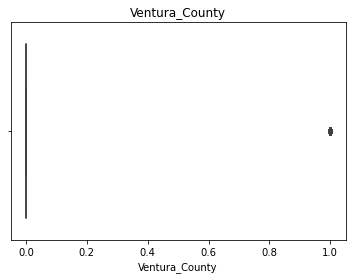

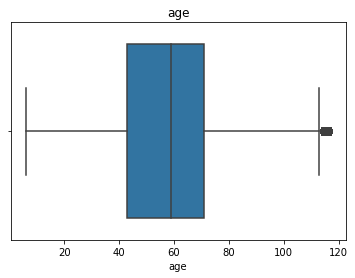

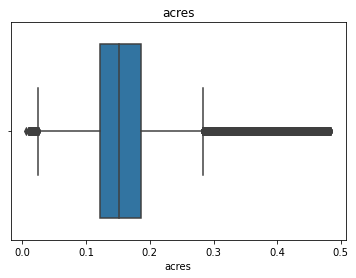

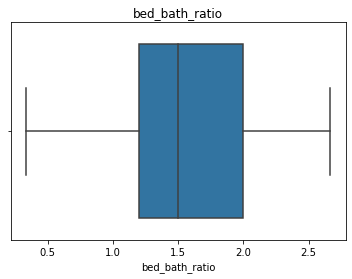

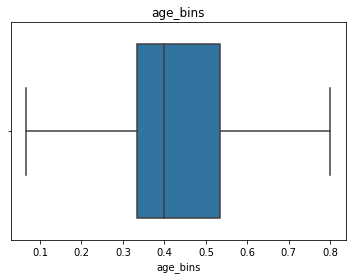

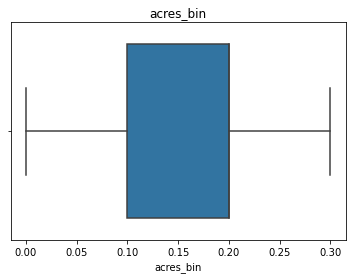

In [203]:
# viewing outliers
for col in zillow_df.columns:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

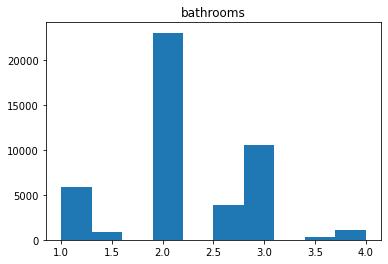

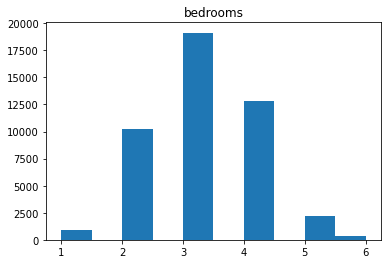

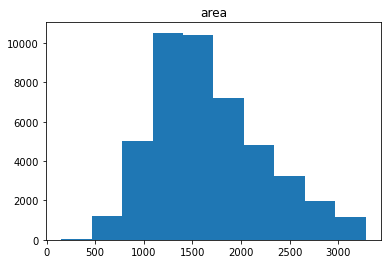

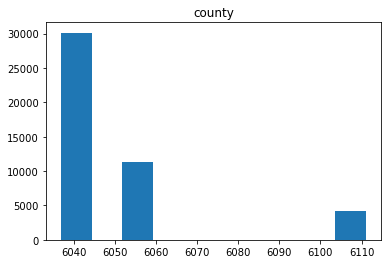

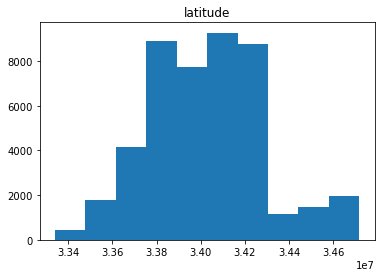

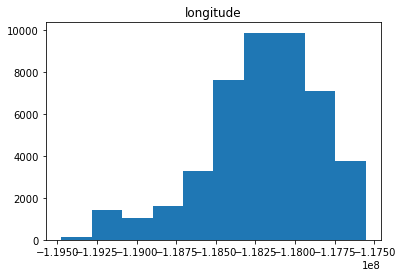

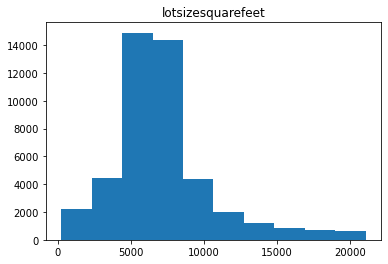

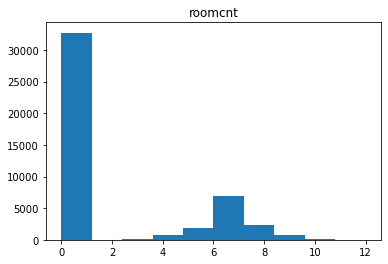

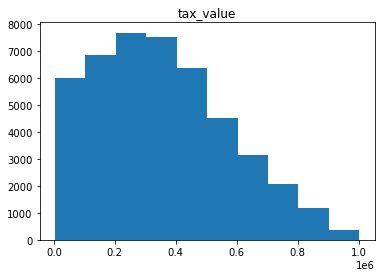

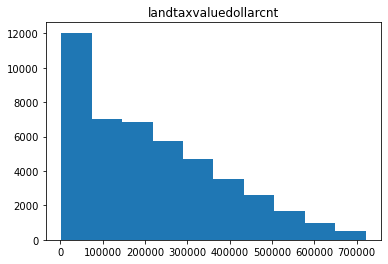

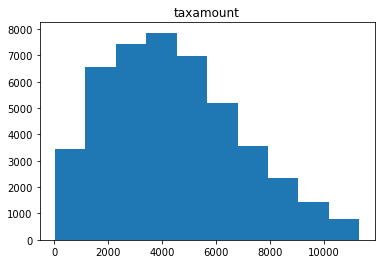

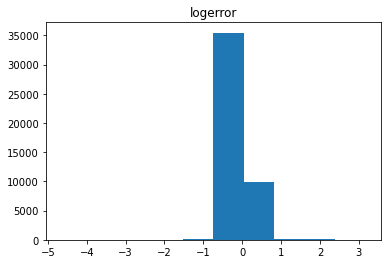

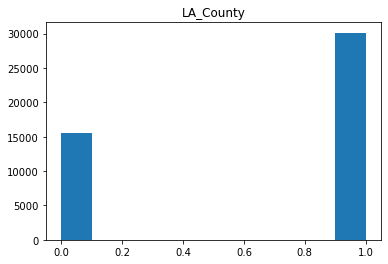

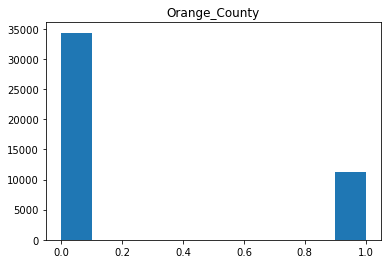

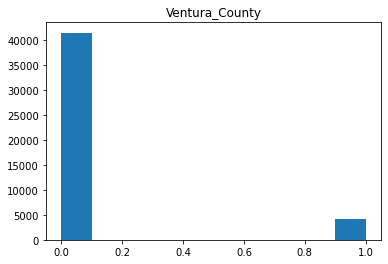

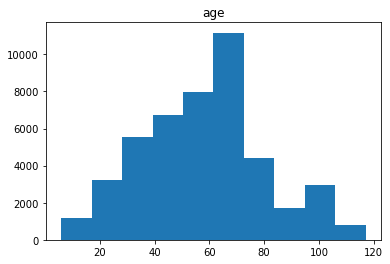

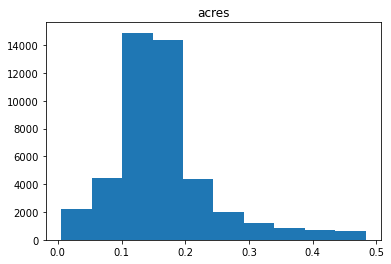

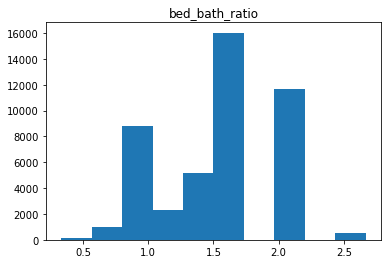

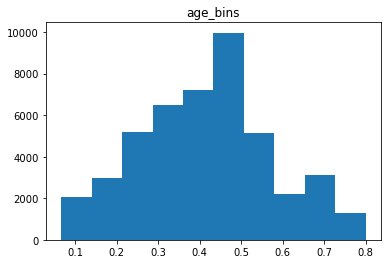

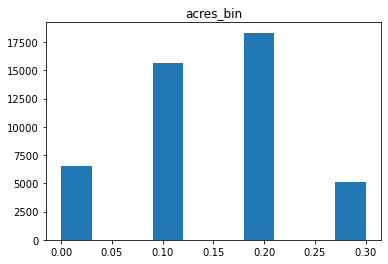

In [204]:
for col in zillow_df.columns:
    plt.hist(zillow_df[col])
    plt.title(col)
    plt.show()

In [207]:

# This is to create dataframs that only consist of individual counties for future exploration ideas
# LA only DF
df_la = zillow_df[zillow_df.LA_County == 1]
# Orange county only DF
df_or = zillow_df[zillow_df.Orange_County == 1]
# Ventura county only DF
df_ve = zillow_df[zillow_df.Ventura_County == 1]

In [215]:
# Splitting my data
def split(df, target_var):
    
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]

    partitions = [train, X_train, y_train, validate, X_validate, y_validate, test, X_test, y_test]
    return partitions

In [216]:
partitions = split(zillow_df, target_var = 'logerror')

In [217]:
train = partitions[0]

In [218]:
train.shape

(25561, 20)

In [227]:
train['abs_log'] = train['logerror'].abs()

In [228]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 62952 to 55595
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bathrooms              25561 non-null  float64 
 1   bedrooms               25561 non-null  float64 
 2   area                   25561 non-null  float64 
 3   county                 25561 non-null  float64 
 4   latitude               25561 non-null  float64 
 5   longitude              25561 non-null  float64 
 6   lotsizesquarefeet      25561 non-null  float64 
 7   roomcnt                25561 non-null  float64 
 8   tax_value              25561 non-null  float64 
 9   landtaxvaluedollarcnt  25561 non-null  float64 
 10  taxamount              25561 non-null  float64 
 11  logerror               25561 non-null  float64 
 12  LA_County              25561 non-null  int64   
 13  Orange_County          25561 non-null  int64   
 14  Ventura_County         25561 non-n

In [219]:
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

In [220]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    17082
(0.05, 0.2]       3844
(-0.2, -0.05]     3041
(0.2, 4.0]        1112
(-5.0, -0.2]       482
Name: logerror_bins, dtype: int64

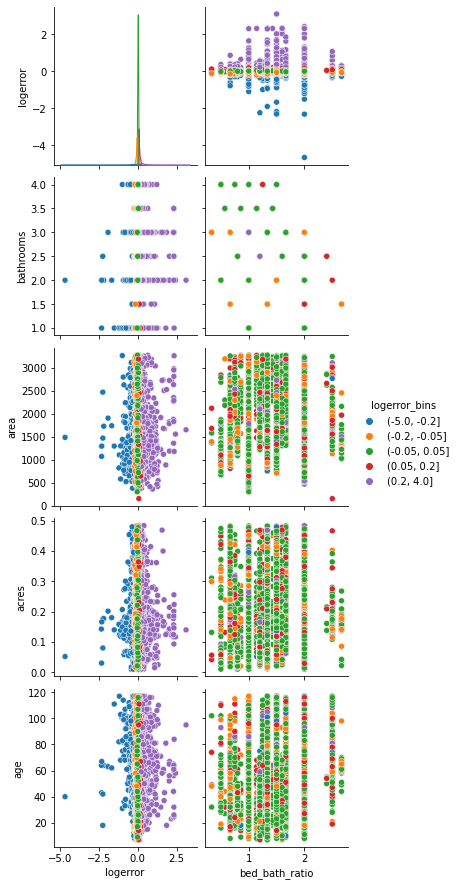

In [223]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 
                       'bed_bath_ratio'],
             y_vars = ['logerror', 'bathrooms', 'area', 'acres', 'age'])

<AxesSubplot:xlabel='LA_County', ylabel='logerror'>

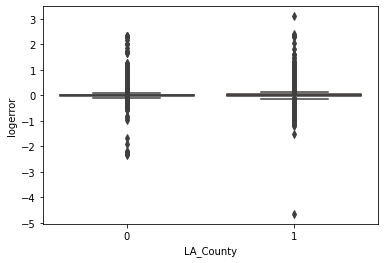

In [237]:
sns.boxplot(train.LA_County, train.logerror)

<AxesSubplot:xlabel='Ventura_County', ylabel='logerror'>

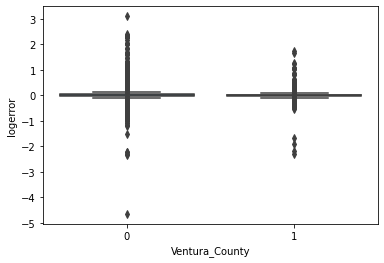

In [238]:
sns.boxplot(train.Ventura_County, train.logerror)

<AxesSubplot:xlabel='Orange_County', ylabel='logerror'>

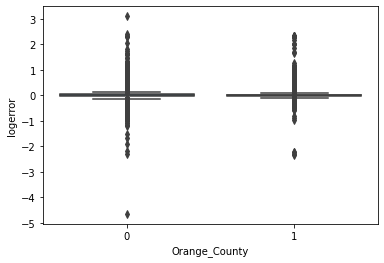

In [239]:
sns.boxplot(train.Orange_County, train.logerror)

In [232]:
train.head()

,bathrooms,bedrooms,area,county,latitude,longitude,lotsizesquarefeet,roomcnt,tax_value,landtaxvaluedollarcnt,...,LA_County,Orange_County,Ventura_County,age,acres,bed_bath_ratio,age_bins,acres_bin,logerror_bins,abs_log
62952,2.0,3.0,1910.0,6037.0,34141135.0,-118069733.0,14690.0,0.0,84943.0,34939.0,...,1,0,0,87,0.337236,1.500000,0.600,0.3,"(-0.05, 0.05]",0.023357
18519,3.0,5.0,2965.0,6037.0,34116699.0,-118226054.0,5562.0,0.0,439333.0,292893.0,...,1,0,0,41,0.127686,1.666667,0.333,0.1,"(0.05, 0.2]",0.114887
31433,3.0,3.0,2388.0,6037.0,33875945.0,-118355497.0,17419.0,0.0,350032.0,109462.0,...,1,0,0,33,0.399885,1.000000,0.266,0.3,"(0.05, 0.2]",0.139967
2249,2.0,3.0,1353.0,6059.0,33858501.0,-117963533.0,6700.0,7.0,129412.0,71148.0,...,0,1,0,67,0.153811,1.500000,0.466,0.2,"(-0.05, 0.05]",0.002537
24002,1.5,2.0,1024.0,6059.0,33842442.0,-117944157.0,1048.0,5.0,201596.0,146657.0,...,0,1,0,58,0.024059,1.333333,0.400,0.0,"(-0.2, -0.05]",0.066029


In [233]:
train.abs_log.max()

4.65542037764

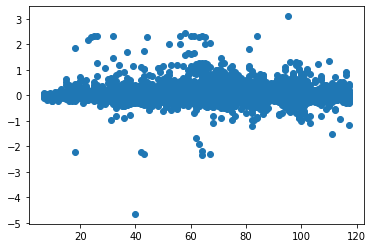

In [250]:
plt.scatter(x = 'age', y = 'logerror', data = train)

<AxesSubplot:xlabel='age_bins', ylabel='logerror'>

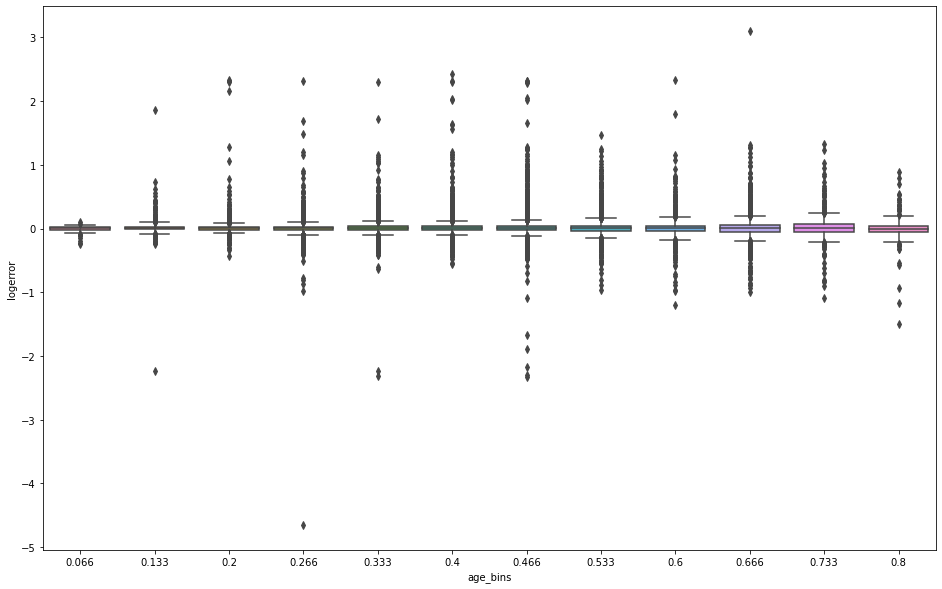

In [243]:
plt.figure(figsize = (16,10))
sns.boxplot(train.age_bins, train.logerror)

<AxesSubplot:xlabel='acres_bin', ylabel='logerror'>

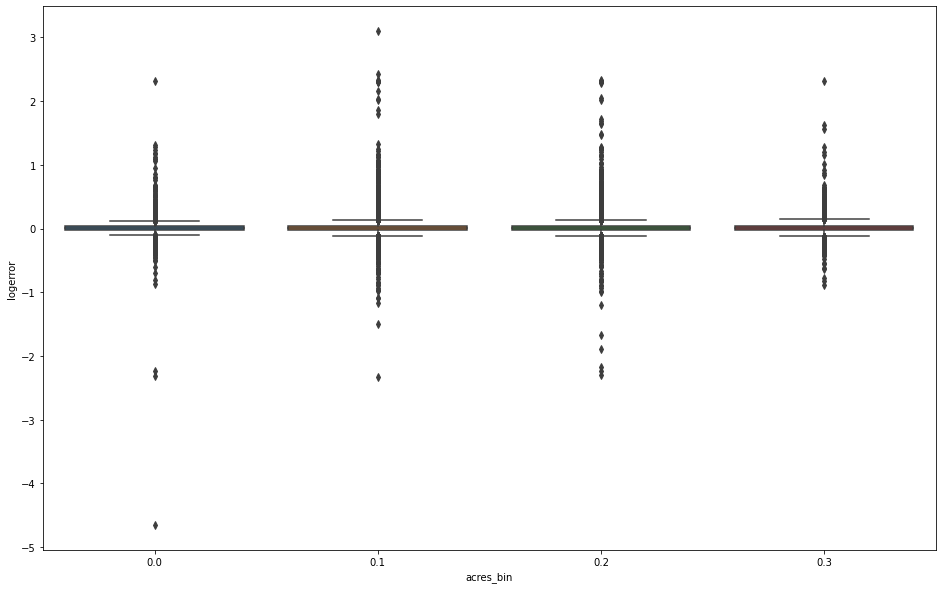

In [244]:
plt.figure(figsize = (16,10))
sns.boxplot(train.acres_bin, train.logerror)

In [ ]:
# Scale this data

# the variables that still need scaling
scaled_vars = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'acres', 'area', 'tax_value',
              'age', '']

# create new column names for the scaled variables by adding 'scaled_' to the beginning of each variable name 
scaled_column_names = ['scaled_' + i for i in scaled_vars]

# select the X partitions: [X_train, X_validate, X_test]
X = partitions[1:4]

# fit the minmaxscaler to X_train
X_train = X[0]
scaler = MinMaxScaler(copy=True).fit(X_train[scaled_vars])


def scale_and_concat(df):
    scaled_array = scaler.transform(df[scaled_vars])
    scaled_df = pd.DataFrame(scaled_array, columns=scaled_column_names, index=df.index.values)
    return pd.concat((df, scaled_df), axis=1)

for i in range(len(X)):
    X[i] = scale_and_concat(X[i])